In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import datetime, timedelta

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [6]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [7]:
#reflect an existing database into a new model
Base=automap_base()
#reflect the tables
Base.prepare(engine,reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
# Getting all the columns in a Measurement table
columns_measure = inspector.get_columns('measurement')
for row in columns_measure:
    print(row['name'],row['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).limit(12).all()
# this is the last date of precipitation
print(f"Date and precipitation data is : {precipitation[0]}")

Date and precipitation data is : ('2017-08-23', 0.0)


In [15]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
#print("Query Date:", query_date)
query_date

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
output=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=query_date).all()
for row in output:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.35)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.02)
('2017-03-24', 0.07)
('2017-03-25', 0.43)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.08)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.36)
('2017-04-15', 0.0)
('2017-04-16', 0.0)
('2017-04-17', 0.3)
('2017-04-18', 0.15)
('2017-04-19', 0.0)
('2017-04-20', 0.35)
('2017-04-21', 2.36)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.01)
('2017-04-27', 0.0)
('2017-04-28', 0.0)
('2017-04-29', 6.25)
('2017-04-30', 1.31)
('2017-05-01', 0.07)
('2017-05-02', 0.0)
('2017-05-03', 0.0)
('2017-05-04', 0.0)
('201

In [21]:
#Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(output, columns=['date','Prec_scores'])
climate_df

,date,Prec_scores
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [23]:
#Sort the dataframe by date
rename = climate_df.rename(columns={"prcp":'Prec_scores'}).sort_values('date', ascending=True)
rename.set_index("date", inplace=True)


In [24]:
#drop 'Nan' scores
clear_climate_df = rename.dropna(how='any')
clear_climate_df

,Prec_scores
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


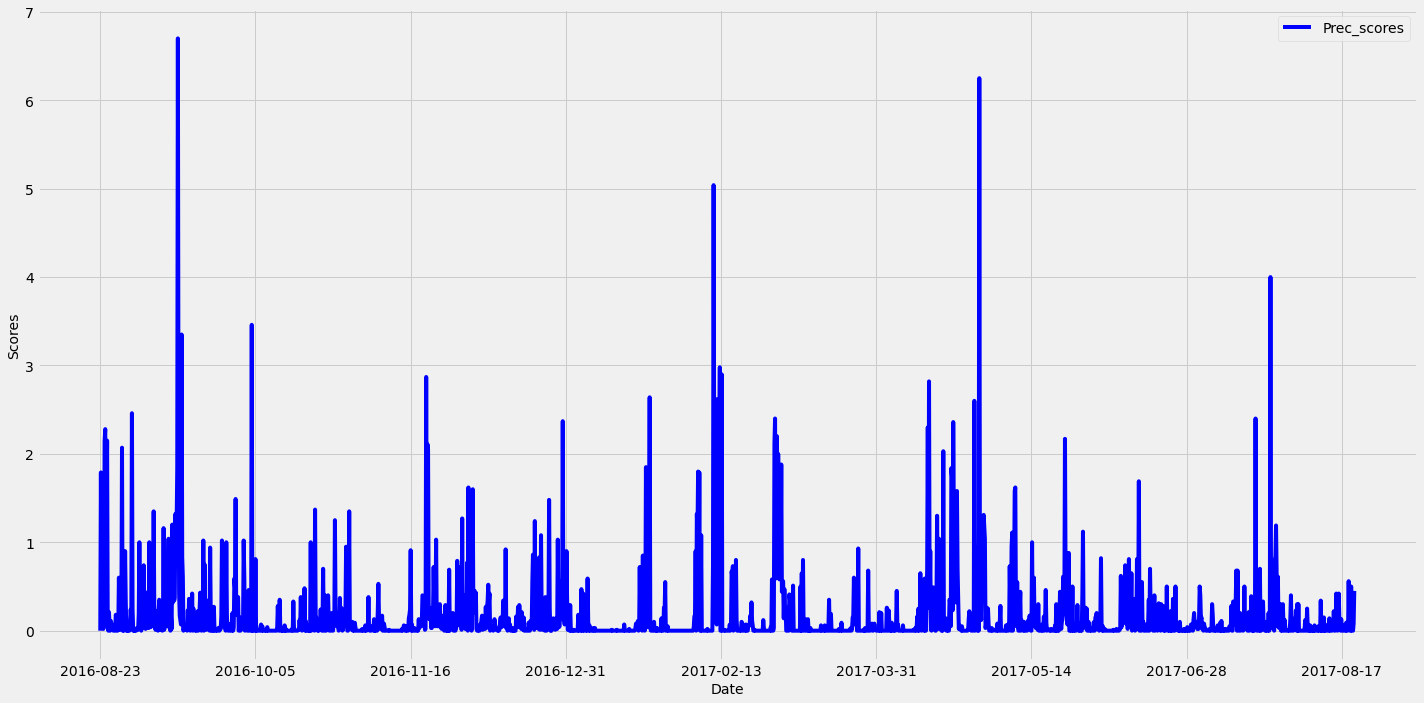

In [26]:
#use Pandas plotting with Matplotlib to plot the data
chart1=clear_climate_df.plot(figsize=(20,10),color='blue')
chart1.set_xlabel("Date", fontsize=14)
chart1.set_ylabel("Scores",fontsize=14)
plt.tight_layout()
plt.savefig("Images/Bar_Chart1.png")
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistic_preci= clear_climate_df['Prec_scores'].describe()
statistic_preci_df=pd.DataFrame(statistic_preci)
statistic_preci_df

,Prec_scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
dataset_num= session.query(Station.station).count()
dataset_num

9

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station= session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]